In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy import fftpack


# Abrimos los datos.
medicion = np.loadtxt('data/v2/ej11_medicion.txt', delimiter=' ', skiprows=3)
print("Los datos an sido cargados")

Los datos an sido cargados


### Función de referencia
Primero armamos una función de referencia con la que comparar nuestros datos. La info de la función con la que se realizaron los datos esta en el mismo archivo txt que contiene los datos.

In [143]:
### Defino variables temporales de la medición.
Fs = 100000               #[Hz] Frecuencia de muestreo                    
FRef = 200           #[Hz] Frecuencia de la referencia
L = len(medicion)         #[muestras] Longitud de la señal

# Calculamos variables asociadas 
T = 1/Fs                  #[s] Periodo de muestreo
MaxT = L/Fs               #[s] Tiempo maximo
t = np.linspace(0,L-1,L)*T         #[s] Time vector
OmegaRef = FRef*2*np.pi     #[rad/s] frecuencia angular de referencia

# Elección de tiempo caracteríscito y orden del filtro
fc= 15            #[Hz] Frecuencia de corte
orden = 3           # Orden del filtro.

#Genero las señales de referencia del lock-in.
Referencia_x=np.array(np.sin(OmegaRef*t))
Referencia_y=np.array(np.cos(OmegaRef*t))     #referencia desfasada en 90º

### Demodulación de la señal

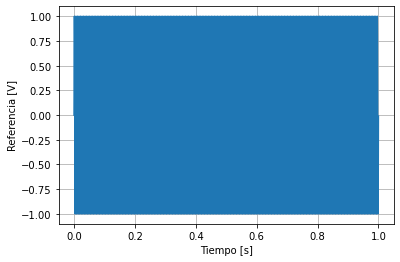

In [144]:
%matplotlib inline
# 1 Muestro la referencia.

plt.plot(t, Referencia_x, label='Referencia')
#plt.plot(t, Referencia_y, label='Referencia')

plt.ylabel('Referencia [V]')
plt.xlabel('Tiempo [s]')
plt.grid(True)
plt.show()

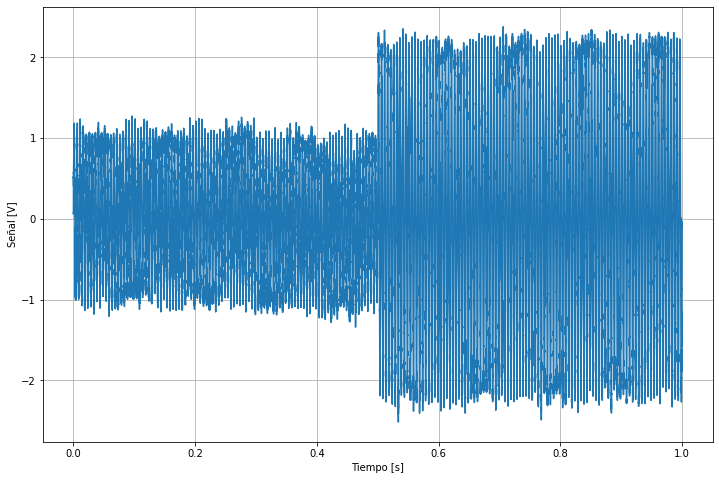

In [145]:
# 2 Muestro la señal
%matplotlib inline
plt.figure(figsize=(12,8))
plt.plot(t, medicion, label='Señal')
plt.ylabel('Señal [V]')
plt.xlabel('Tiempo [s]')
plt.grid(True)
plt.show()

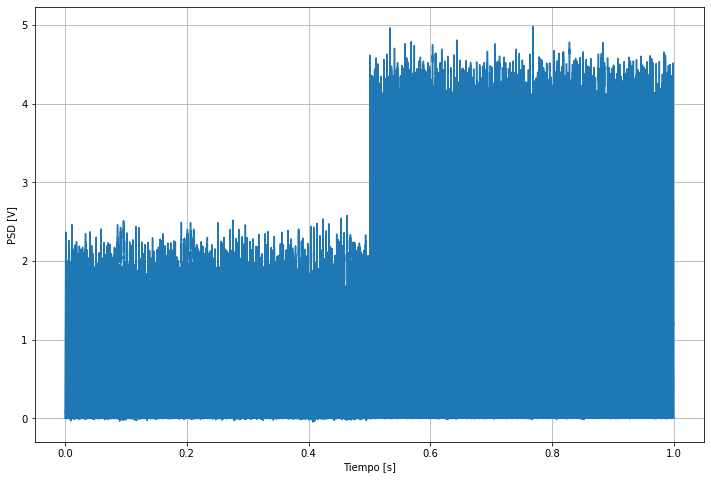

In [146]:
# 3 Detección de fase. Multiplicación por referencia
%matplotlib inline
plt.figure(figsize=(12,8))
#PSDx = np.sqrt((2 * medicion * Referencia_x)**2)
PSDx = 2 * medicion * Referencia_x
PSDy = 2 * medicion * Referencia_y #PSD del segundo canal
# Graficamos señal multiplicada
plt.plot(t, PSDx, label='Señal')
# ax[2].plot(t, PSDy, label='Señal')
plt.ylabel('PSD [V]')
plt.xlabel('Tiempo [s]')
plt.grid(True)
plt.show()

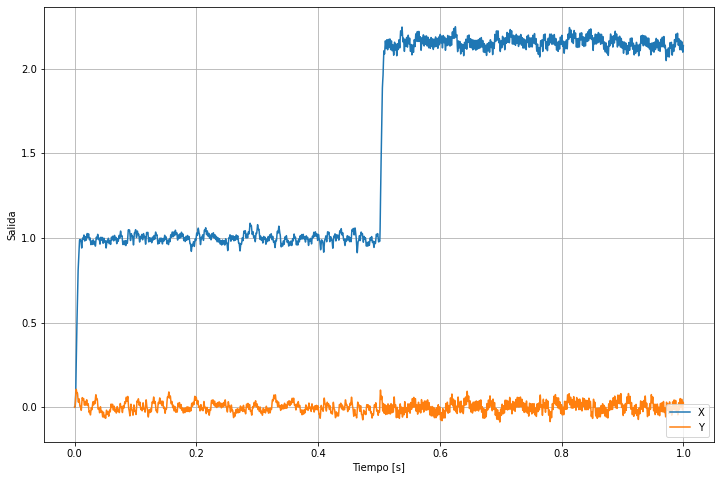

In [147]:
# Filtrado de señal 
sos = signal.bessel(orden, 2*np.pi*fc, 'low', fs=Fs,output='sos') # Generación de parametros del filrado
PSDxFiltrada= signal.sosfilt(sos,PSDx) # Filtrado
PSDyFiltrada= signal.sosfilt(sos,PSDy) # Filtrado

%matplotlib inline
plt.figure(figsize=(12,8))

## Para graficar R y theta
#plt.plot(t,np.arctan2(PSDyFiltrada,PSDxFiltrada,), label=r'$\theta$')
#plt.plot(t,PSDxFiltrada**2+PSDyFiltrada**2,label='R')

## Para graficar X e Y
plt.plot(t,PSDxFiltrada,label='X')
plt.plot(t,PSDyFiltrada,label='Y')
plt.legend(loc='lower right')
plt.ylabel('Salida')
plt.xlabel('Tiempo [s]')
plt.grid(True)
plt.show()

### Análisis de fourier de la señal

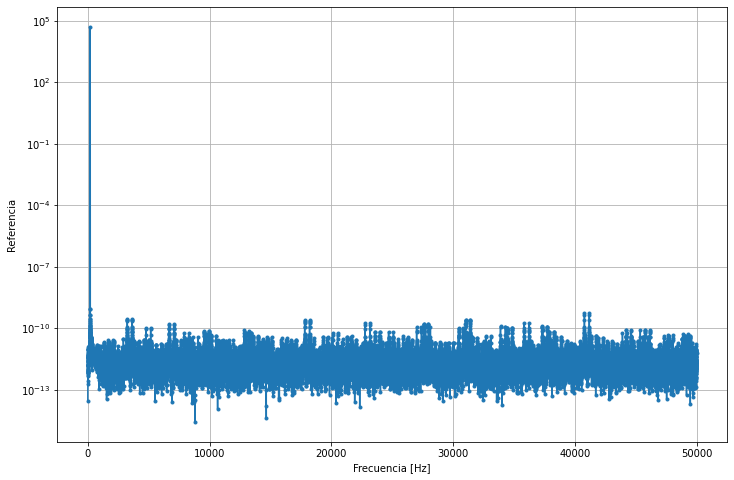

In [148]:
# Armamos el vector de frecuencias.
freqs=np.fft.fftfreq(L,1/Fs)

%matplotlib inline
plt.figure(figsize=(12,8))

# 1 Grafica la FFT de la referencia
fftReferencia= np.abs(np.fft.fft(Referencia_x));
plt.semilogy(freqs[0:L//2],fftReferencia[0:L//2],'.-') 
plt.ylabel('Referencia')
plt.xlabel('Frecuencia [Hz]')
#plt.xlim([1,2.5*FRef])
plt.xscale('linear')
plt.grid(True)
plt.show()


In [19]:
%matplotlib qt
plt.figure(figsize=(12,8))
# 2 Grafica la FFT de la señal
fftSenial= np.abs(np.fft.fft(np.array(medicion)))
plt.semilogy(freqs[0:L//2],fftSenial[0:L//2],'.-') 
plt.ylabel('Señal')
plt.xlabel('Frecuencia [Hz]')
#plt.xlim([1,2.5*FRef])
plt.xscale('linear')
plt.grid(True)
plt.show()


In [21]:
%matplotlib qt
plt.figure(figsize=(12,8))
# 3 Grafica la FFT de la señal multiplicada
fftPSDx= np.abs(np.fft.fft(PSDx));
fftPSDy= np.abs(np.fft.fft(PSDy));
plt.semilogy(freqs[0:L//2],fftPSDx[0:L//2],'.-') 
plt.ylabel('PSD')
plt.xlabel('Frecuencia [Hz]')
#plt.xlim([1,2.5*FRef])
plt.xscale('linear')
plt.grid(True)
plt.show()

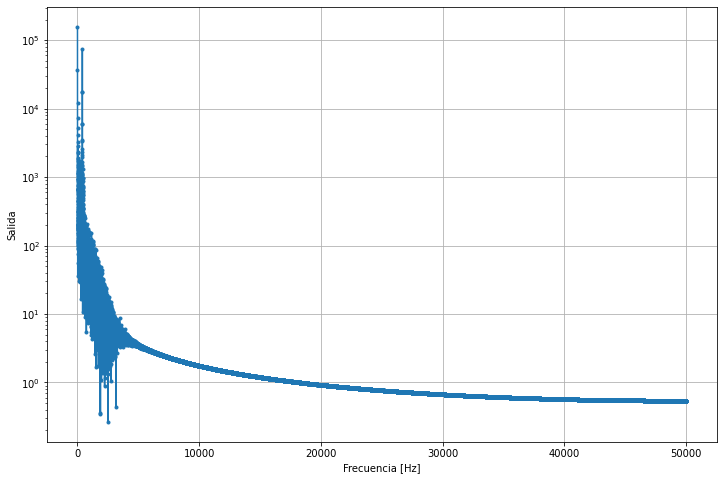

In [16]:
%matplotlib inline
plt.figure(figsize=(12,8))
# 4 Grafica la FFT de la señal demodulada
fftPSDxFiltrada= np.abs(np.fft.fft(PSDxFiltrada));
fftPSDyFiltrada= np.abs(np.fft.fft(PSDyFiltrada));
plt.semilogy(freqs[0:L//2],fftPSDxFiltrada[0:L//2],'.-') 
plt.ylabel('Salida')
plt.xlabel('Frecuencia [Hz]')
#plt.xlim([1,2.5*FRef])
plt.xscale('linear')
plt.grid(True)
plt.show()

In [ ]:
#%matplotlib qt
#def MakeSpectral(y, Fs, fignum=1):
#    
#    yfft = fftpack.fft(y)
#    N = len(y)
#    xf = np.linspace(0, Fs/2, int(N/2))
#    yf = 2.0/N * np.abs(yfft[:N//2])
#    #print(PosicionPicos)
#    #print(IntensidadPicos)
##    VectorFrecuenciaPicos = [xf[i] for i in PosicionPicos]
#    return xf, yf
#
#fsamp = Fs
#vv=np.array_split(medicion*Referencia_x,100)
#L=[]
#Lx=[]
#s=MakeSpectral(vv,fsamp)
#s0=s[0]
#for i in range(100):
#    l=MakeSpectral(vv[i], fsamp)
#    L.append(l[1])
#
#plt.style.use("classic")
#
#from matplotlib.colors import LogNorm
#plt.figure(figsize = (10, 7))
#nparr=np.linspace(0,150,len(s0))
#lis=[]
#liss0=[]#
#for i in range(len(s0)):
#    lis.append(nparr[i])
#    liss0.append(s0[i])
#
#plt.imshow(L,norm=LogNorm())
#esa=210.5*3/10
#esa2=33.5*3/10
##plt.axvline(esa,color='k')
##plt.axvline(esa2,color='k')
#
##plt.xticks([0,33.5*3/10,50*3/10,100*3/10,210.5*3/10,300*3/10,400*3/10,500*3/10],[0,33.5,50,100,211.4,300,400,500])
#plt.xlabel(r'$\omega$ (Hz)',fontsize=16)
#plt.ylabel(r'$\tau$ (0.03 s)',fontsize=16)
#plt.tight_layout()
#plt.show()